In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
dataset = 'BigEarthNet'
# dataset = 'EuroSAT'
dataset = 'So2Sat' 
# dataset = 'OSCD'
models = []
names = []
# models += ['vit_base_patch16_224']
# models += ['cvit_base_patch16_224']
models += ['cvit_p1_base_patch16_224']
# models += ['mm_cvit_base_patch16_224']
# models += ['mm_lr_vit_base_patch16_224']
# names += ['mae_vit_v2']
# names += ['mae_cvit_v2']
# names += ['mae_base']
# names += ['mae_vit_btnk']
metric = 'micro_mAP' if dataset == 'BigEarthNet' else 'accuracy'
if dataset == 'OSCD':
    # metric = 'precision'
    metric = 'f1'
    # metric = 'recall'

In [21]:
log_path = './results/logs/'
all_logs = os.listdir(log_path)
target_logs = [log for log in all_logs if dataset in log and any([model in log for model in models])]
# print(len(target_logs))
target_logs

['So2Sat_cvit_p1_base_patch16_224_mae_cvit_0-12-0',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_0-1-11',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_2-2-8',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_4-4-4',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_1-1-10',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_1-2-9',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_2-0-10',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_0-2-10',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_0-0-12',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_2-1-9',
 'So2Sat_cvit_p1_base_patch16_224_mae_cvit_1-0-11']

In [22]:
df_all = pd.DataFrame()
for target_log in target_logs:
    name = '_'.join(target_log.split('_')[-3:])
    try:
        path = f'./results/logs/{target_log}/ft_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
# df_all.sort_values(by=[metric], inplace=True)
# get the best lr for each model
df_all_best = df_all.loc[df_all.groupby('model')[metric].idxmax()]
print(len(df_all))
df_all_best.sort_values(by=[metric])
df_all

10


,epochs,lr,weight_decay,ce,loss,accuracy,epoch,num_samples,model
0,10,0.00050,0.0005,2.222962,2.222962,0.634442,10,48307,mae_cvit_0-1-11
1,10,0.00005,0.0005,1.476596,1.476596,0.634587,10,48307,mae_cvit_0-1-11
2,10,0.00500,0.0005,1.782125,1.782125,0.457677,10,48307,mae_cvit_1-1-10
3,10,0.00050,0.0005,2.214312,2.214312,0.637506,10,48307,mae_cvit_1-1-10
4,10,0.00005,0.0005,1.583041,1.583041,0.641812,10,48307,mae_cvit_1-1-10
5,10,0.00500,0.0005,1.822769,1.822769,0.448175,10,48307,mae_cvit_0-0-12
6,10,0.00005,0.0005,1.495849,1.495849,0.633552,10,48307,mae_cvit_0-0-12
7,10,0.00050,0.0005,2.093865,2.093865,0.634152,10,48307,mae_cvit_0-0-12
8,10,0.00005,0.0005,1.604005,1.604005,0.623284,10,48307,mae_cvit_1-0-11
9,10,0.00050,0.0005,2.305009,2.305009,0.630757,10,48307,mae_cvit_1-0-11


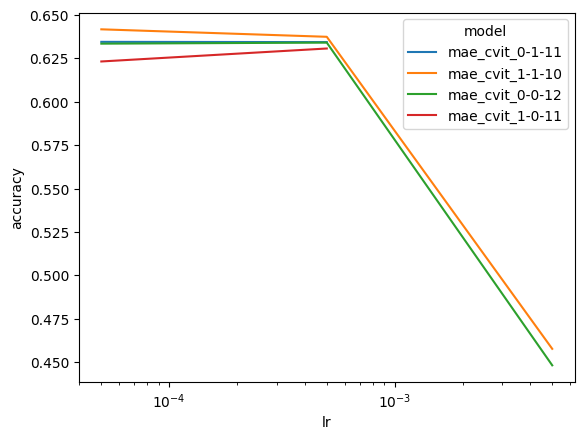

In [23]:
sns.lineplot(data=df_all.loc[df_all.weight_decay==5e-4], x='lr', y=metric, hue='model')
# set x axis log scale
plt.xscale('log')

In [24]:
df_all = pd.DataFrame()
for target_log in target_logs:
    name = '_'.join(target_log.split('_')[-3:])
    try:
        path = f'./results/logs/{target_log}/lp_metrics.csv'
        df = pd.read_csv(path)
        df.sort_values(by=[metric], inplace=True)
    except:
        continue
    # add model name
    df['model'] = name
    df_all = pd.concat([df_all, df], ignore_index=True)
# df_all.sort_values(by=[metric], inplace=True)
# get the best lr for each model
df_all_best = df_all.loc[df_all.groupby('model')[metric].idxmax()]
df_all
df_all_best.sort_values(by=[metric])

,epochs,lr,weight_decay,ce,loss,accuracy,epoch,num_samples,model
5,100,0.03,0,1.322172,1.322172,0.594738,100,48307,mae_cvit_0-12-0
40,100,0.03,0,1.248331,1.248331,0.599458,100,48307,mae_cvit_1-0-11
26,100,0.03,0,1.270904,1.270904,0.607614,100,48307,mae_cvit_2-0-10
33,100,0.03,0,1.246302,1.246302,0.608649,100,48307,mae_cvit_0-0-12
27,100,0.03,0,1.180055,1.180055,0.608835,100,48307,mae_cvit_0-2-10
24,100,0.03,0,1.253287,1.253287,0.610057,100,48307,mae_cvit_1-1-10
18,100,0.03,0,1.245895,1.245895,0.612706,100,48307,mae_cvit_4-4-4
12,100,0.03,0,1.229848,1.229848,0.615170,100,48307,mae_cvit_2-2-8
11,100,0.03,0,1.203034,1.203034,0.617902,100,48307,mae_cvit_0-1-11
34,100,0.03,0,1.197410,1.197410,0.619351,100,48307,mae_cvit_2-1-9


<Axes: xlabel='lr', ylabel='accuracy'>

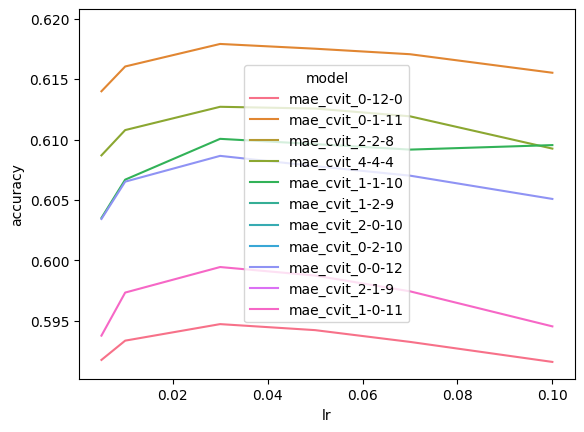

In [25]:
sns.lineplot(data=df_all.loc[df_all.epochs==100], x='lr', y=metric, hue='model')

In [24]:
# parse the model name in the df_all_best
df = df_all_best.copy()
df['model'] = df['model'].apply(lambda x: x.split('_')[-1])
df['spectral'] = df['model'].apply(lambda x: x.split('-')[0])
df['spatial_spectral'] = df['model'].apply(lambda x: x.split('-')[1])
df[metric] *= 100

Text(0.5, 1.0, 'So2Sat LP accuracy (%)')

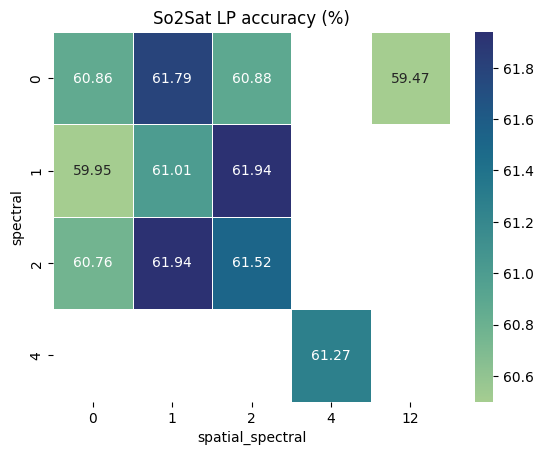

In [39]:
# drop the heatmap of df_all_best_cvit, x: spatial_spectral, y: spectral, hue: metric
df_attn = df.pivot(index='spectral', columns='spatial_spectral', values=metric)
column_order = ['0', '1', '2', '4', '12']  # replace with your desired order
df_attn = df_attn.reindex(column_order, axis=1)
sns.heatmap(df_attn, annot=True, fmt=".2f", cmap='crest', linewidth=.5, vmin=60.5)
plt.title(f'{dataset} LP {metric} (%)')

spatial_spectral,0,1,2,4,12
spectral,,,,,
0,94.518519,94.740741,94.203704,NaN,93.518519
1,94.444444,93.907407,94.685185,NaN,NaN
2,92.666667,94.018519,94.296296,NaN,NaN
4,NaN,NaN,NaN,94.388889,NaN


In [22]:
df_all_best_cvit.pivot()

TypeError: DataFrame.pivot() takes 1 positional argument but 2 were given